# **Biodata Diri**
1. Nama  : Ilham Hanami
2. Email : hanamiilham@gmail.com
3. Tempat,Tanggal lahir : Banjarmasin, 06 September 1998
4. Kota / Kabupaten saat ini : Kabupaten Malang
5. Institusi saat ini : Universitas Muhammadiyah Malang
6. Alamat : Jl.Majapahit blok i7 no 22 RT 004 RW 007 
Kelurahan Sukapura, Kecamatan Cilincing, Kota Jakarta Utara

# **Extracting Files & Importing Library**

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import zipfile,os,shutil

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-03 09:06:06--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.35MB/s    in 52s     

2020-11-03 09:06:59 (5.91 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
roc_dir = os.path.join(base_dir,'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')

In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [ ]:
train_roc = os.path.join(train_dir, 'rock')
train_pap = os.path.join(train_dir, 'paper')
train_sci = os.path.join(train_dir, 'scissors')
val_roc = os.path.join(validation_dir, 'rock')
val_pap = os.path.join(validation_dir, 'paper')
val_sci = os.path.join(validation_dir, 'scissors')

In [ ]:
os.mkdir(train_roc)
os.mkdir(train_pap)
os.mkdir(train_sci)
os.mkdir(val_roc)
os.mkdir(val_pap)
os.mkdir(val_sci)

# **train test split**

In [ ]:
# split rock,paper dan scissor direktori validation 40% of dataset
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)

In [ ]:
for file in train_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(train_roc, file))
for file in train_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(train_pap,file))
for file in train_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(train_sci,file))
for file in val_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(val_roc,file))
for file in val_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(val_pap,file))
for file in val_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(val_sci,file))

# **Augmentasi**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(60,40),
    batch_size= 32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (60,40),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# **Build Model**

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (60,40,3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(256, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 58, 38, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 58, 38, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 19, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 8, 64)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 6, 128)        73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 3, 128)        

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=2,
                                            factor=0.5,
                                            min_lr=0.0003)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs = 25,
                    verbose = 2,
                   steps_per_epoch = 30,
                   validation_data = validation_generator,
                   validation_steps = 27,
                   callbacks=[learning_rate_reduction])

Epoch 1/25
30/30 - 5s - loss: 0.1564 - accuracy: 0.9521 - val_loss: 0.1565 - val_accuracy: 0.9491
Epoch 2/25
30/30 - 5s - loss: 0.1198 - accuracy: 0.9646 - val_loss: 0.3748 - val_accuracy: 0.8403
Epoch 3/25
30/30 - 5s - loss: 0.1089 - accuracy: 0.9635 - val_loss: 0.0975 - val_accuracy: 0.9711
Epoch 4/25
30/30 - 5s - loss: 0.0902 - accuracy: 0.9708 - val_loss: 0.6075 - val_accuracy: 0.8194
Epoch 5/25
30/30 - 5s - loss: 0.1285 - accuracy: 0.9594 - val_loss: 0.3473 - val_accuracy: 0.8576
Epoch 6/25

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
30/30 - 5s - loss: 0.0966 - accuracy: 0.9719 - val_loss: 0.2676 - val_accuracy: 0.9016
Epoch 7/25
30/30 - 5s - loss: 0.0800 - accuracy: 0.9740 - val_loss: 0.0759 - val_accuracy: 0.9722
Epoch 8/25
30/30 - 5s - loss: 0.0561 - accuracy: 0.9844 - val_loss: 0.0809 - val_accuracy: 0.9722
Epoch 9/25
30/30 - 5s - loss: 0.0798 - accuracy: 0.9823 - val_loss: 0.0927 - val_accuracy: 0.9722
Epoch 10/25
30/30 - 5s - loss: 0.0848

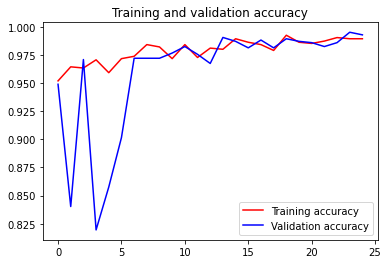

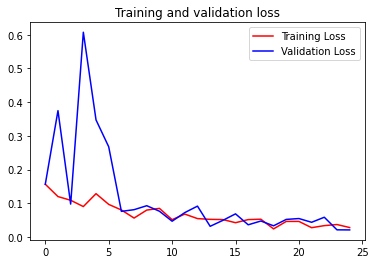

In [ ]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Saving 0Flw60Z2MAWWKn6S.png to 0Flw60Z2MAWWKn6S.png
0Flw60Z2MAWWKn6S.png
scissors


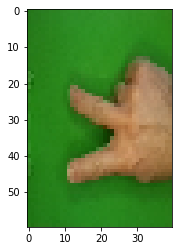

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(60,40))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')